# Introdução

<center>

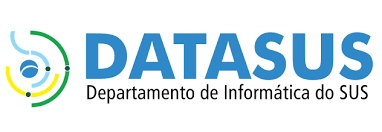

Este Jupyter Notebook foi desenvolvido com o objetivo de extrair e limpar os dados de mortalidade na região Centro-Oeste do Brasil, utilizando o PySUS, uma biblioteca Python criada por Flavio Codeco Coelho. PySUS é uma coleção de códigos auxiliares projetados para baixar e analisar dados do DATASUS, o sistema de informações de saúde pública do Brasil.

A análise de dados de mortalidade é essencial para entender a saúde da população, identificar padrões de mortalidade, e auxiliar na formulação de políticas públicas de saúde. Este trabalho se concentra na extração e limpeza dos dados de mortalidade, visando preparar um conjunto de dados que possa ser posteriormente utilizado para análises mais detalhadas e geração de insights valiosos.

A região Centro-Oeste do Brasil, composta pelos estados de Goiás, Mato Grosso, Mato Grosso do Sul e o Distrito Federal, possui características demográficas e socioeconômicas diversas que impactam os indicadores de saúde. Este estudo pretende fornecer uma base sólida para futuras análises detalhadas das causas de mortalidade e suas variações ao longo do tempo e entre diferentes sub-regiões.

# Coleta dos dados

## Instalando PySUS

In [1]:
!pip install PySUS

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 441.8/441.8 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.7/385.7 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.0/127.0 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.7/118.7 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━

## Carregamento dos Arquivos de Dados

https://pysus.readthedocs.io/pt/latest/databases/SIM.html

In [1]:
# Importing the PySUS API for Mortality Data
from pysus.ftp.databases.sim import SIM

In [2]:
# Libraries for Data Manipulation
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import difflib

In [3]:
# clear_output is needed to clear visualization of downloading data
from IPython.display import clear_output

In [4]:
sim = SIM().load() # Loads the files from DATASUS

http://tabnet.saude.es.gov.br/cgi/tabnet/sim/sim96/obtdescr.htm

In [5]:
# Select only the recent protocol for recording health data
br_mort_files = sim.get_files("CID10")

In [6]:
# Creating a DataFrame with the ftp file information to validate it
files_description_df = pd.DataFrame({'name': [],
                                     'uf': [],
                                     'year': [],
                                     'group': [],
                                     'size': [],
                                     'last_update': []})

for file in br_mort_files:
  file_description = {k:[v] for k,v in sim.describe(file).items()}
  file_description = pd.DataFrame(file_description)
  files_description_df = pd.concat([files_description_df, file_description],
                                   ignore_index= True)

In [7]:
# First and last files
files_description_df.iloc[[0,-1]]

,name,uf,year,group,size,last_update
0,DOAC1996.dbc,Acre,1996.0,CID10,76.1 kB,2020-01-31 02:48PM
732,DOTO2022.dbc,Tocantins,2022.0,CID10,827.7 kB,2023-12-21 04:20PM


In [8]:
# Converting year column to integer data type
files_description_df["year"] = files_description_df["year"].astype(int)

In [9]:
# Creating a pivot table with uf by year to check last updates
uf_year_update = pd.pivot_table(data= files_description_df, index= 'uf',
                                columns= 'year', values= 'last_update',
                                aggfunc= lambda x: x)

In [10]:
uf_year_update.loc[["Pará", "Bahia", "São Paulo", "Paraná", "Mato Grosso do Sul", "Distrito Federal"],
                   2017:]

year,2017,2018,2019,2020,2021,2022
uf,,,,,,
Pará,2020-01-31 02:49PM,2020-04-02 04:34PM,2021-04-06 12:55PM,2022-04-01 01:41PM,2023-04-28 12:02PM,2023-12-21 04:19PM
Bahia,2020-01-31 02:48PM,2020-04-02 04:34PM,2021-04-06 12:55PM,2022-03-31 04:19PM,2023-04-28 11:56AM,2023-12-21 04:17PM
São Paulo,2020-01-31 02:51PM,2020-04-02 04:34PM,2021-04-06 12:55PM,2022-03-31 04:19PM,2023-04-28 12:07PM,2023-12-21 04:20PM
Paraná,2020-01-31 02:50PM,2020-04-02 04:34PM,2021-04-06 12:55PM,2022-03-31 04:19PM,2023-04-28 12:03PM,2023-12-22 01:20PM
Mato Grosso do Sul,2020-01-31 02:49PM,2020-04-02 04:34PM,2021-04-06 12:55PM,2022-03-31 04:19PM,2023-04-28 12:02PM,2023-12-21 04:19PM
Distrito Federal,2020-01-31 02:49PM,2020-04-02 04:34PM,2021-04-06 12:55PM,2022-03-31 04:19PM,2023-04-28 12:00PM,2023-12-21 04:19PM


In [11]:
# Checing the number of files per state/uf
files_description_df.groupby('uf')['year'].count()

uf
Acre                   27
Alagoas                27
Amapá                  27
Amazonas               27
Bahia                  27
Brasil                  4
Ceará                  27
Distrito Federal       27
Espírito Santo         27
Goiás                  27
Maranhão               27
Mato Grosso            27
Mato Grosso do Sul     27
Minas Gerais           27
Paraná                 27
Paraíba                27
Pará                   27
Pernambuco             27
Piauí                  27
Rio Grande do Norte    27
Rio Grande do Sul      27
Rio de Janeiro         27
Rondônia               27
Roraima                27
Santa Catarina         27
Sergipe                27
São Paulo              27
Tocantins              27
Name: year, dtype: int64

A instância Brasil não é coerente com o de federações brasileiras. Vamos averiguar esses arquivos para saber se o incluimos nas análises.

### Verificando arquivos incoerentes

In [12]:
# Looking what the incoherent data looks like
files_description_df[files_description_df['uf'] == "Brasil"]

,name,uf,year,group,size,last_update
135,DOBR2019.dbc,Brasil,2019,CID10,108.4 MB,2021-04-06 12:55PM
136,DOBR2020.dbc,Brasil,2020,CID10,133.0 MB,2022-04-01 01:41PM
137,DOBR2021.dbc,Brasil,2021,CID10,147.3 MB,2023-04-28 11:59AM
138,DOBR2022.dbc,Brasil,2022,CID10,126.0 MB,2023-12-22 01:20PM


Antes de baixar os arquivos, farei uma verificação dos tamanhos para averiguar se há de fato desfalque ou excesso consideravel de dados.

In [13]:
# Selecting rows with files in MegaBytes
mb_size_rows = files_description_df['size'].str.contains('MB')
mb_size_rows.value_counts()

size
True     443
False    290
Name: count, dtype: int64

In [14]:
# Creating a new column to convert file size to a float number of kB
files_description_df['size_kb'] = files_description_df['size']

# Erasing unity of measure
files_description_df['size_kb'] = files_description_df['size_kb'].str.replace(" kB", "")
files_description_df['size_kb'] = files_description_df['size_kb'].str.replace(" MB", "")

# Convertion of the column to float
files_description_df['size_kb'] = files_description_df['size_kb'].astype(float)

# Multiply MB rows by 1000
files_description_df.loc[mb_size_rows, "size_kb"] = files_description_df.loc[mb_size_rows, "size_kb"] * 1000

# Show a sample of 5 rows
files_description_df[["uf",	"year",	"size", "size_kb"]].sample(5)

,uf,year,size,size_kb
229,Goiás,2005,1.3 MB,1300.0
586,Roraima,2011,106.1 kB,106.1
234,Goiás,2010,2.3 MB,2300.0
327,Mato Grosso do Sul,2022,1.7 MB,1700.0
200,Espírito Santo,2003,884.3 kB,884.3


In [15]:
# Creating a new column for incoherent uf
files_description_df["incoherent_uf"] = files_description_df["uf"] == "Brasil"
# Subtet of data after 2015
files_after_2015 = files_description_df[files_description_df["year"] >= 2015.0]
# Show how this table looks like
files_after_2015[["uf", "year", "size_kb", "incoherent_uf"]].sample(5)

,uf,year,size_kb,incoherent_uf
131,Bahia,2019,7200.0,False
678,Sergipe,2022,1300.0,False
347,Mato Grosso,2015,1800.0,False
100,Amapá,2015,268.0,False
671,Sergipe,2015,1300.0,False


In [16]:
# Group by year and the label tha marks if the uf is right
gb_after_2015 = files_after_2015.groupby(["year", "incoherent_uf"], as_index= False)["size_kb"].sum()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


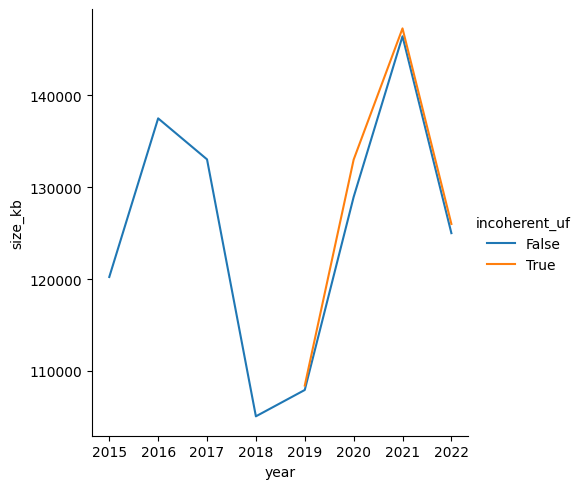

In [17]:
# Plot a line graph between year and size
sns.relplot(data= gb_after_2015, kind= "line",
            x="year", y= "size_kb",
            hue= "incoherent_uf")

Já que os dados tem tamanho parecido, vou usar somente os das unidades federativas para manter a coerência com os anos anteriores.

## Baixando os dados

In [18]:
# Select the region data
states = ["Goiás", "Distrito Federal", "Mato Grosso", "Mato Grosso do Sul"]

is_target_states = files_description_df["uf"].isin(states)
is_target_years = files_description_df["year"] >= 2003

# Store the indexes
index_files_interest = files_description_df[(is_target_states & is_target_years)].index
index_files_interest

Index([173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186,
       187, 188, 189, 190, 191, 192, 227, 228, 229, 230, 231, 232, 233, 234,
       235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 308, 309,
       310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323,
       324, 325, 326, 327, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344,
       345, 346, 347, 348, 349, 350, 351, 352, 353, 354],
      dtype='int64')

**ATENÇÃO!** \\
Após alguns testes percebi que a alocação de memoria RAM é maior que o tamanho dos arquivos ftp como o visto no DataFrame anterior, recomendo usar um serviço de notebook web (como o Google Colab) e que o carregamento de dados seja feito em partes.

In [19]:
def download_dataframe_by_index(files, index):
  """
    Function that takes a list with files from PySUS
    and a list of selected indexes from that table and
    return the downloaded DataFrame showing each region
    and year that's being loaded the process.

    Input:
      age_code: String

    Output:
      String value to the corresponding age code
  """

  # Empty DataFrame to be concated
  complete_df = pd.DataFrame()

  # Loop of selected indexes
  for i in index:
    # Select the correspoonding file from PySUS
    current_file = files[i]
    # Get description to update printouts
    file_description = sim.describe(current_file)

    print("Baixando", file_description["uf"], file_description["year"])

    # Download the data
    parquet = current_file.download()
    # Convert it to a DataFrame
    current_df = parquet.to_dataframe()

    # Joining the data
    complete_df = pd.concat([complete_df, current_df])

    # Clear the last print
    clear_output(wait=True)

  print("Download Finalizado!")

  return complete_df

In [20]:
df = download_dataframe_by_index(br_mort_files, index_files_interest)

Download Finalizado!


In [21]:
df.columns

Index(['contador', 'TIPOBITO', 'DTOBITO', 'NATURAL', 'DTNASC', 'IDADE', 'SEXO',
       'RACACOR', 'ESTCIV', 'ESC', 'CODBAIRES', 'OCUP', 'CODMUNRES', 'LOCOCOR',
       'CODESTAB', 'CODMUNOCOR', 'IDADEMAE', 'ESCMAE', 'OCUPMAE', 'QTDFILVIVO',
       'QTDFILMORT', 'GRAVIDEZ', 'GESTACAO', 'PARTO', 'OBITOPARTO', 'PESO',
       'OBITOGRAV', 'OBITOPUERP', 'ASSISTMED', 'EXAME', 'CIRURGIA',
       'NECROPSIA', 'CAUSABAS', 'LINHAA', 'LINHAB', 'LINHAC', 'LINHAD',
       'LINHAII', 'ATESTANTE', 'CIRCOBITO', 'ACIDTRAB', 'FONTE', 'UFINFORM',
       'CONTADOR', 'HORAOBITO', 'CODBAIOCOR', 'TPASSINA', 'DTATESTADO',
       'TPPOS', 'DTINVESTIG', 'CAUSABAS_O', 'DTCADASTRO', 'FONTEINV',
       'DTRECEBIM', 'CB_PRE', 'MORTEPARTO', 'TPOBITOCOR', 'ORIGEM', 'DTCADINF',
       'DTCADINV', 'COMUNSVOIM', 'DTRECORIG', 'DTRECORIGA', 'CAUSAMAT',
       'ESC2010', 'ESCMAE2010', 'STDOEPIDEM', 'STDONOVA', 'CODMUNCART',
       'CODCART', 'NUMREGCART', 'DTREGCART', 'SERIESCFAL', 'ESCMAEAGR1',
       'ESCFALAGR1', 'SERIES

O dicionário de dados utilizado neste projeto pode ser acessado através do seguinte link: [Dicionário de Dados SIM](https://svs.aids.gov.br/daent/cgiae/sim/documentacao/dicionario-de-dados-SIM-tabela-DO.pdf). Embora este dicionário seja focado em dados relacionados à AIDS, foi a melhor referência disponível para entender a estrutura e os campos dos registros de óbitos do DATASUS.


In [22]:
columns_of_interest = [
    'DTOBITO', 'IDADE', 'SEXO',
    'RACACOR', 'ESTCIV', 'ESC', 'OCUP',
    'LOCOCOR', 'CODMUNOCOR', 'ASSISTMED',
    'CAUSABAS', 'CIRCOBITO'
]

mort_df = df[columns_of_interest].copy()

mort_df.head()

,DTOBITO,IDADE,SEXO,RACACOR,ESTCIV,ESC,OCUP,LOCOCOR,CODMUNOCOR,ASSISTMED,CAUSABAS,CIRCOBITO
0,13072003,445,1,,,,02100,1,2704302,,W699,1
1,08012003,483,2,1,3,,00800,1,2903904,,I219,
2,28022003,449,2,1,2,4,31000,4,2909307,,V499,
3,26012003,460,2,,2,,14000,4,2933307,,R98,
4,09022003,404,1,1,,,,4,2933307,,V892,1


In [23]:
# Loading 2023 data by url
sim_2023_url = "https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/SIM/DO23OPEN.csv"
mort_2023_df = pd.read_csv(sim_2023_url, sep= ";", low_memory= False)

# Converting city code to string
mort_2023_df["CODMUNOCOR"] = mort_2023_df["CODMUNOCOR"].astype(str)

# Subset center-west region by the first number equal '5'
cw_states_2023 = mort_2023_df["CODMUNOCOR"].str.slice(0, 1) == '5'
mort_cw_2023_df = mort_2023_df[cw_states_2023]

# Subset columns of interest
mort_cw_2023_df = mort_cw_2023_df[columns_of_interest]

# Convert float columns to string
columns_2023 = mort_cw_2023_df.columns
for col in columns_2023:
  if 'float' in str(mort_cw_2023_df[col].dtype):
    mort_cw_2023_df[col] = mort_cw_2023_df[col].astype(str)
    mort_cw_2023_df[col] = mort_cw_2023_df[col].str.replace('.0', '')

mort_cw_2023_df.head()

,DTOBITO,IDADE,SEXO,RACACOR,ESTCIV,ESC,OCUP,LOCOCOR,CODMUNOCOR,ASSISTMED,CAUSABAS,CIRCOBITO
18,14022023,474,2,4,2,4,999993,1,510025,1,I64,nan
19,14022023,436,2,1,1,1,999994,1,510025,1,W790,1
40,17022023,nan,2,nan,nan,nan,nan,1,530010,1,P008,nan
56,17022023,440,1,4,2,3,715210,3,500450,9,R99,nan
81,1012023,443,2,4,2,3,999992,1,510794,1,C509,nan


In [24]:
# Add 2023 to the main DataFrame
mort_df = pd.concat([mort_df, mort_cw_2023_df])

mort_df.head()

,DTOBITO,IDADE,SEXO,RACACOR,ESTCIV,ESC,OCUP,LOCOCOR,CODMUNOCOR,ASSISTMED,CAUSABAS,CIRCOBITO
0,13072003,445,1,,,,02100,1,2704302,,W699,1
1,08012003,483,2,1,3,,00800,1,2903904,,I219,
2,28022003,449,2,1,2,4,31000,4,2909307,,V499,
3,26012003,460,2,,2,,14000,4,2933307,,R98,
4,09022003,404,1,1,,,,4,2933307,,V892,1


# Tratamento do DataFrame

In [25]:
mort_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1709380 entries, 0 to 1485652
Data columns (total 12 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   DTOBITO     object
 1   IDADE       object
 2   SEXO        Int64 
 3   RACACOR     object
 4   ESTCIV      object
 5   ESC         object
 6   OCUP        object
 7   LOCOCOR     object
 8   CODMUNOCOR  object
 9   ASSISTMED   object
 10  CAUSABAS    object
 11  CIRCOBITO   object
dtypes: Int64(1), object(11)
memory usage: 171.2+ MB


In [26]:
mort_df.head()

,DTOBITO,IDADE,SEXO,RACACOR,ESTCIV,ESC,OCUP,LOCOCOR,CODMUNOCOR,ASSISTMED,CAUSABAS,CIRCOBITO
0,13072003,445,1,,,,02100,1,2704302,,W699,1
1,08012003,483,2,1,3,,00800,1,2903904,,I219,
2,28022003,449,2,1,2,4,31000,4,2909307,,V499,
3,26012003,460,2,,2,,14000,4,2933307,,R98,
4,09022003,404,1,1,,,,4,2933307,,V892,1


### Dados Quantitativos

In [27]:
def age_convertion(age_code):
  """
  Convert the age to an int value in years as the explanation in the
  data dictionary follows:

  Idade composto de dois subcampos. O primeiro, de 1 dígito, indica
  a unidade da idade, conforme a tabela a seguir. O segundo, de dois
  dígitos, indica a quantidade de unidades: 0 – Idade menor de 1
  hora, o subcampo varia de 01 e 59; 1 – Hora, o subcampo varia de
  01 a 23; 2 – Dias, o subcampo varia de 01 a 29; 3 – Meses, o
  subcampo varia de 01 a 11; 4 – Anos, o subcampo varia de 00 a 99;
  5 – Anos (mais de 100 anos), o segundo subcampo varia de 0 a 99

  Input:
    age_code: String

  Output:
    String value to the corresponding age code
  """

  if (len(age_code) < 3):
    return 'Na'

  if (age_code[0] == '0' or
      age_code[0] == '1' or
      age_code[0] == '2' or
      age_code[0] == '3'):
    return '0'
  elif (age_code[0] == '4'):
    return age_code[1:]
  elif (age_code[0] == '5'):
    return '1' + age_code[1:]
  else:
    return 'Na'

In [28]:
# Show how the first 5 age values are set
mort_df["IDADE"].head().values

array(['445  ', '483  ', '449  ', '460  ', '404  '], dtype=object)

In [29]:
# Remove blank spaces
mort_df["IDADE"] = mort_df["IDADE"].str.strip()

# Apply function to convert from code to integer
mort_df["IDADE"] = mort_df["IDADE"].apply(lambda x: age_convertion(x))

In [30]:
# NaN values can't exist in a int column

# Let's look the percentage of NaN values
(mort_df["IDADE"] != "Na").value_counts(normalize= True) * 100

IDADE
True     99.569786
False     0.430214
Name: proportion, dtype: float64

In [31]:
# Discard empty age values
mort_df = mort_df[mort_df["IDADE"] != "Na"]

# Convert the column to a light Integer type
mort_df["IDADE"] = mort_df.loc[:, "IDADE"].astype("Int16")
mort_df["IDADE"].head().values

<IntegerArray>
[45, 83, 49, 60, 4]
Length: 5, dtype: Int16

In [32]:
# Converting date column to it's apropriate data type
mort_df["DTOBITO"] = pd.to_datetime(mort_df["DTOBITO"],
                                    format='%d%m%Y',
                                    errors='coerce')

mort_df["DTOBITO"].head()

0   2003-07-13
1   2003-01-08
2   2003-02-28
3   2003-01-26
4   2003-02-09
Name: DTOBITO, dtype: datetime64[ns]

### Dados Categoricos

In [33]:
# Example of unique instances for categorical variables
mort_df['RACACOR'].unique()

array(['', '1      ', '4      ', '2      ', '3      ', '5      ', '1',
       '2', '4', '3', '5', 'nan'], dtype=object)

In [34]:
categorical_columns = [
    'SEXO', 'RACACOR', 'ESTCIV', 'ESC', 'OCUP',
    'LOCOCOR', 'CODMUNOCOR', 'ASSISTMED',
    'CAUSABAS','CIRCOBITO']


for col in categorical_columns:
  # If the column is not a string
  if mort_df[col].dtype != "string":
    # Convert to string
    mort_df[col] = mort_df[col].astype(str)

  # Remove spaces
  mort_df[col] = mort_df[col].str.replace(' ', '')

In [35]:
# Creation of dictionaries to map the instances

SEXO_dict = {
    '1': "Masculino",
    '2': "Feminino"
}

RACACOR_dict = {
    '1' : "Branca",
    '2' : "Preta",
    '3' : "Amarela",
    '4' : "Parda",
    '5' : "Indígena"
}

ESTCIV_dict = {
    '1': "Solteiro",
    '2': "Casado",
    '3': "Viúvo",
    '4': "Separado judicialmente",
    '5': "União consensual"
}

ESC_dict = {
    '1': "Nenhuma",
    '2': "1 a 3 anos",
    '3': "4 a 7 anos",
    '4': "8 a 11 anos",
    '5': "12 e mais"
}

LOCOCOR_dict = {
    '1' : "Hospital",
    '2' : "Outro estabelecimento de saúde",
    '3' : "Domicílio",
    '4' : "Via pública",
    '5' : "Outros"
}

ASSISTMED_dict = {
    '1' : "Sim",
    '2' : "Não"
}

CIRCOBITO_dict = {
    '1': "Acidente",
    '2': "Suicídio",
    '3': "homicídio",
    '4': "outros"
}

# Dict with column name and the corresponding mapping that needs to be done
map_col_to_dict = {
    "SEXO": SEXO_dict, "RACACOR": RACACOR_dict,
    "ESTCIV": ESTCIV_dict, "ESC": ESC_dict,
    "LOCOCOR": LOCOCOR_dict, "ASSISTMED": ASSISTMED_dict,
    "CIRCOBITO": CIRCOBITO_dict
}

In [39]:
# Loop through the column dictionary
for col, dic in map_col_to_dict.items():
  # before mapping selecet the rows that does not equal any key
  non_mapped_rows = (~mort_df[col].isin(dic.keys()))
  # Map the values
  mort_df[col] = mort_df[col].map(dic)
  # Fill the NaN values with "Ignorado"
  mort_df.loc[non_mapped_rows, col] = "Ignorado"

In [41]:
# Convert categorical columns to a lighter and apropriate data type
for col in categorical_columns:
  mort_df[col] = mort_df[col].astype("category")

# Set ordinal category "ESC"
mort_df["ESC"] = mort_df["ESC"].cat.set_categories(
    ["Ignorado"] + list(map_col_to_dict["ESC"].values()),
    ordered = True
)

In [44]:
# Verifying results
mort_df.head()

,DTOBITO,IDADE,SEXO,RACACOR,ESTCIV,ESC,OCUP,LOCOCOR,CODMUNOCOR,ASSISTMED,CAUSABAS,CIRCOBITO
0,2003-07-13,45,Masculino,Ignorado,Ignorado,Ignorado,02100,Hospital,2704302,Ignorado,W699,Acidente
1,2003-01-08,83,Feminino,Branca,Viúvo,Ignorado,00800,Hospital,2903904,Ignorado,I219,Ignorado
2,2003-02-28,49,Feminino,Branca,Casado,8 a 11 anos,31000,Via pública,2909307,Ignorado,V499,Ignorado
3,2003-01-26,60,Feminino,Ignorado,Casado,Ignorado,14000,Via pública,2933307,Ignorado,R98,Ignorado
4,2003-02-09,4,Masculino,Branca,Ignorado,Ignorado,,Via pública,2933307,Ignorado,V892,Acidente


In [45]:
mort_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1702026 entries, 0 to 1485652
Data columns (total 12 columns):
 #   Column      Dtype         
---  ------      -----         
 0   DTOBITO     datetime64[ns]
 1   IDADE       Int16         
 2   SEXO        category      
 3   RACACOR     category      
 4   ESTCIV      category      
 5   ESC         category      
 6   OCUP        category      
 7   LOCOCOR     category      
 8   CODMUNOCOR  category      
 9   ASSISTMED   category      
 10  CAUSABAS    category      
 11  CIRCOBITO   category      
dtypes: Int16(1), category(10), datetime64[ns](1)
memory usage: 52.3 MB


In [46]:
clean_df_size = mort_df.memory_usage(deep= True).sum() / 1024**2

dirty_copy = df[columns_of_interest].copy()
dirt_df_size = dirty_copy.memory_usage(deep= True).sum() / 1024**2

print("Dirt DataFrame memory usage {} MB".format(round(dirt_df_size, 3)))
print("Clean DataFrame memory usage {} MB\n".format(round(clean_df_size, 3)))

print("Difference of memory usage {} MB".format(round(dirt_df_size - clean_df_size, 3)))

Dirt DataFrame memory usage 1069.56 MB
Clean DataFrame memory usage 52.857 MB

Difference of memory usage 1016.704 MB


## Dados Complementares

Adicionei à tabela de mortalidade os nomes sobre as ocupações brasileiras, conforme a [Classificação Brasileira de Ocupações](https://portalfat.mte.gov.br/wp-content/uploads/2016/04/CBO2002_Liv3.pdf) (CBO) de 2002. Estes dados foram extraídos do repositório do GitHub do usuário ppKrauss, disponível no link: [lista_canonicos.csv](https://github.com/datasets-br/cbo/blob/master/data/lista_canonicos.csv).


In [47]:
# Looking at number of digits proportion in the occupation column to check its integrity
mort_df["OCUP"].apply(lambda x: len(x)).value_counts(normalize= True) * 100

OCUP
6    73.937825
0    16.302512
5     9.058322
3     0.701341
Name: proportion, dtype: float64

In [48]:
# Loading professons code acording to 2002
url_professions = "https://raw.githubusercontent.com/datasets-br/cbo/master/data/lista_canonicos.csv"
cbo_df = pd.read_csv(url_professions)

# Remove dashes
cbo_df["codigo"] = cbo_df["codigo"].str.replace('-', '')

cbo_df.head()

,codigo,termo
0,848505,Abatedor
1,766305,Acabador de embalagens (flexíveis e cartotécni...
2,716105,Acabador de superfícies de concreto
3,848510,Açougueiro
4,376205,Acrobata


In [49]:
# Merging original with occupation DataFrames
termo_cbo_2002 = pd.merge(mort_df["OCUP"], cbo_df, how='left',
                          left_on= "OCUP", right_on= "codigo"
                          )["termo"]

# Create a new column with the occupations names
mort_df["termo_cbo_2002"] = termo_cbo_2002.values

In [50]:
# Fill null value with "Código Inválido"
mort_df["termo_cbo_2002"] = mort_df["termo_cbo_2002"].fillna("Código Inválido")

print("Há algum valor vazio?", mort_df["termo_cbo_2002"].isna().any(), "\n")
display(mort_df["termo_cbo_2002"].value_counts(normalize= True).head() * 100)

Há algum valor vazio? False 



termo_cbo_2002
Código Inválido                            62.851273
Trabalhador agropecuário em geral           3.623153
Trabalhador volante da agricultura          3.101833
Empregado doméstico nos serviços gerais     2.470879
Pedreiro                                    2.363477
Name: proportion, dtype: float64

Também é feita relação com municípios brasileiros, relacionando-os ao local de ocorrência da morte. Estes dados foram extraídos do repositório do GitHub do usuário kelvins, disponível no link: [municipios.csv](https://github.com/kelvins/municipios-brasileiros/blob/main/csv/municipios.csv).


In [51]:
# Load cities DataFrame
url_municipios = "https://raw.githubusercontent.com/kelvins/municipios-brasileiros/main/csv/municipios.csv"
municipios = pd.read_csv(url_municipios)

municipios.head()

,codigo_ibge,nome,latitude,longitude,capital,codigo_uf,siafi_id,ddd,fuso_horario
0,5200050,Abadia de Goiás,-16.75730,-49.4412,0,52,1050,62,America/Sao_Paulo
1,3100104,Abadia dos Dourados,-18.48310,-47.3916,0,31,4001,34,America/Sao_Paulo
2,5200100,Abadiânia,-16.19700,-48.7057,0,52,9201,62,America/Sao_Paulo
3,3100203,Abaeté,-19.15510,-45.4444,0,31,4003,37,America/Sao_Paulo
4,1500107,Abaetetuba,-1.72183,-48.8788,0,15,401,91,America/Sao_Paulo


In [52]:
# Convert city code to string to make comparisons
municipios["codigo_ibge"] = municipios["codigo_ibge"].astype(str)
municipios["codigo_ibge"].dtype

dtype('O')

In [53]:
# Select invalid codes to treat
is_invalid_mun_cod = ~mort_df['CODMUNOCOR'].isin(municipios['codigo_ibge'].values)

is_invalid_mun_cod.value_counts(normalize= True) * 100

CODMUNOCOR
True     89.261797
False    10.738203
Name: proportion, dtype: float64

In [54]:
mort_df.loc[is_invalid_mun_cod, 'CODMUNOCOR'].sample(10).values

['521850', '500830', '500240', '521800', '520510', '520870', '510340', '510790', '510340', '510130']
Categories (2835, object): ['110002', '1100023', '110003', '1100031', ..., '5300108', '539904',
                            '539914', '9900023']

Muitos códigos estão apenas com o ultimo dígito ausente, e aparentemente essa omissão não causa conflitos de identificação.

In [56]:
# Verify if the last digit in the code is irrelevant
city_code_sliced = municipios['codigo_ibge'].str.slice(0, -1)
city_code_sliced.is_unique

True

In [57]:
def ajust_missing_digit_code(code):
  """
    Ajust the last digit of city code if there is a match
    and also return if the code was corrected.
  """

  is_code = city_code_sliced == code
  correction =  municipios.loc[is_code, 'codigo_ibge']

  if correction.empty:
    return code, False
  else:
    return correction.values[0], True

In [58]:
# Dictionary o map invalid codes
map_inv_mun_codes = {}
# list to correct other digitalization mistakes
other_inv_codes = []

# Loop over unique invalid codes
for code in mort_df.loc[is_invalid_mun_cod, 'CODMUNOCOR'].unique():
  correction, is_corrected = ajust_missing_digit_code(code)

  if is_corrected:
    # If code is corrected ajust it
    map_inv_mun_codes[code] = correction
  else:
    # If not, add it to the other list
    other_inv_codes.append(code)

other_inv_codes

['3345295', '520000', '539914', '539904', '9900023', '510000']

In [59]:
# Function to find a code closest match
closest_mun_code = lambda x: difflib.get_close_matches(x, municipios["codigo_ibge"])[0]

# Loop over other invalid codes
for cod in other_inv_codes:
  # Add closest match to the correction dictionary
  map_inv_mun_codes[cod] = closest_mun_code(cod)

In [60]:
# Reconvert city code column to string to operate on it
mort_df["CODMUNOCOR"] = mort_df["CODMUNOCOR"].astype(str)

# Map invalid codes
mort_df.loc[is_invalid_mun_cod, "CODMUNOCOR"] = \
    mort_df.loc[is_invalid_mun_cod, "CODMUNOCOR"].map(map_inv_mun_codes)

In [61]:
# Merge the mortality and the geografical data
mort_df = pd.merge(mort_df, municipios[["codigo_ibge", "nome", "latitude", "longitude"]],
                   how='left', left_on= "CODMUNOCOR", right_on= "codigo_ibge")

mort_df['nome'].value_counts(dropna= False)[:5]

nome
Brasília        287472
Goiânia         276135
Campo Grande    131522
Cuiabá          102990
Anápolis         57347
Name: count, dtype: int64

In [64]:
rename_dict = {}

for col in mort_df.columns:
  rename_dict[col] = col.lower().replace('_', '')

mort_df.rename(columns= rename_dict, inplace= True)

In [65]:
mort_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1702026 entries, 0 to 1702025
Data columns (total 17 columns):
 #   Column        Dtype         
---  ------        -----         
 0   dtobito       datetime64[ns]
 1   idade         Int16         
 2   sexo          category      
 3   racacor       category      
 4   estciv        category      
 5   esc           category      
 6   ocup          category      
 7   lococor       category      
 8   codmunocor    object        
 9   assistmed     category      
 10  causabas      category      
 11  circobito     category      
 12  termocbo2002  object        
 13  codigoibge    object        
 14  nome          object        
 15  latitude      float64       
 16  longitude     float64       
dtypes: Int16(1), category(9), datetime64[ns](1), float64(2), object(4)
memory usage: 113.9+ MB


In [66]:
mort_df.to_csv("mort_center-west_br.csv")

In [68]:
mort_df.to_parquet("mort_center-west_br.parquet.gzip",
                   compression="gzip")